In [3]:
import cv2 as cv
import numpy as np
import os
from PIL import Image


In [70]:
class Deteksi_wajah:
    def __init__(self):
        self.path_train = 'train/'
        self.img = 'img/'
        self.path_dataset = 'dataset/'
        self.path_sample_img = 'img/'
        self.cascade_face = cv.CascadeClassifier('cascade/face_detect.xml')
        self.recognizer = cv.face.LBPHFaceRecognizer_create()
    def update_dataset(self):
        for i, folder_user in enumerate(os.listdir(self.img)):
            for j, foto_user in enumerate(os.listdir(self.img+folder_user)):
                image = cv.imread(f'{self.img}{folder_user}/{foto_user}')
                gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
                wajah = self.cascade_face.detectMultiScale(gray, 1.3, 5)
                for (x, y, w, h) in wajah:
                    cv.imwrite(f'{self.path_dataset}{folder_user}.{i+1}.{j+1}.png', gray[y:y+h, x:x+w])
                    
                # print(self.img+folder_user+'/'+foto_user)
                # print(f"{self.path_dataset+folder_user}.{i+1}.{j+1}.png")
    def train(self):
        faceSample = []
        ids = []
    
        for foto in os.listdir(f'{self.path_dataset}'):
            # print(foto, os.path.split(foto)[-1].split('.')[1])
            # PIL_img = Image.open(f'{self.path_dataset}{foto}').convert('L')
            img = cv.imread(f"{self.path_dataset}{foto}")
            img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            np_img = np.array(img, 'uint8')
            # wajah = self.cascade_face.detectMultiScale(np_img)
            id = int(os.path.split(foto)[-1].split('.')[1])

            # for (x, y, w, h) in wajah:
            faceSample.append(np_img)
            ids.append(id)
        
        print("[INFO START TRAINING]")
        self.recognizer.train(faceSample, np.array(ids))
        self.recognizer.write(f'{self.path_train}latih.yml')
        print(f"[INFO TRAINING SELESAI]: {len(np.unique(ids))} wajah dilatih")
    def tesSample(self,nama):
        nilai = []
        self.recognizer.read(self.path_train+'latih.yml')
        daftar_nama = ['None'] + os.listdir(self.path_sample_img)
        for foto in os.listdir(self.path_sample_img+nama):
            try:
            # print(f'{self.path_sample_img}{nama}/{foto}')
                img = cv.imread(f'{self.path_sample_img}{nama}/{foto}')
                gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
                wajah = self.cascade_face.detectMultiScale(gray, 1.3, 5)
                for (x, y, w, h) in wajah:
                    id, predic = self.recognizer.predict(gray[y:y+h, x:x+w])
                    # print(f'nama: {daftar_nama[id]}, predic: {100-round(predic)}%, file: {foto}')
                    nilai.append(100-round(predic))
            except:
                # print(f'nama: {nama}, predic: BAD, file: {foto}')
                nilai.append(0)
        return nilai


        # for folder_wajah in os.listdir(self.path_sample_img):
        #     for foto in os.listdir(f'{self.path_sample_img}{folder_wajah}'):



            
            # wajah = self.cascade_face.detectMultiScale()
            
            # im_numpy = np.array(PIL_img, 'uint8')
            
            

In [65]:
daftar = os.listdir('img')
print(daftar)

['dzikri', 'diva', 'uki', 'arini']


In [73]:
# instance
daftar = os.listdir('img')
deteksi = Deteksi_wajah()
# deteksi.tesSample(daftar[1])

dzikri = [daftar[0], deteksi.tesSample(daftar[0])]
diva = [daftar[1], deteksi.tesSample(daftar[1])]
uki = [daftar[2], deteksi.tesSample(daftar[2])]
arini = [daftar[3], deteksi.tesSample(daftar[3])]

print(dzikri, len(dzikri[1]))
print(diva, len(diva[1]))
print(uki, len(uki[1]))
print(arini, len(arini[1]))

['dzikri', [100, 100, 100, 100, 100, 100, 100, 100, 100, 59, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]] 20
['diva', [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]] 20
['uki', [100, 100, 100, 100, 100, 100, 100, 16, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]] 20
['arini', [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]] 20


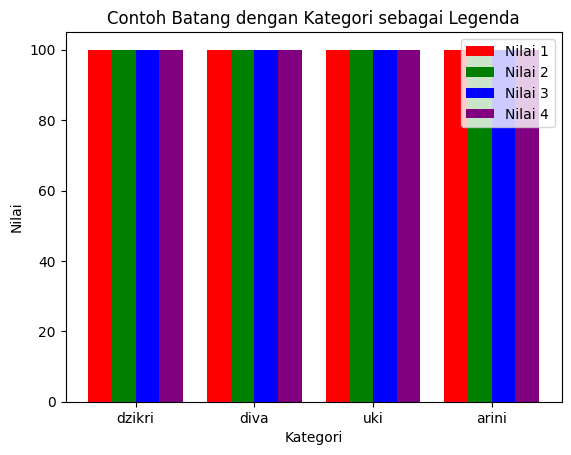

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# categories = ['Kategori 1', 'Kategori 2', 'Kategori 3', 'Kategori 4']
# values1 = [1, 2, 3, 4]
# values2 = [2, 3, 4, 1]
# values3 = [3, 4, 1, 2]
# values4 = [4, 1, 2, 3]
categories = [dzikri[0], diva[0], uki[0], arini[0]]
values1 = dzikri[1][:4]
values2 = diva[1][:4]
values3 = uki[1][:4]
values4 = arini[1][:4]

# Mengatur posisi kategori
x = np.arange(len(categories))

# Lebar setiap batang
bar_width = 0.2

# Menampilkan batang pertama dengan kategori sebagai legenda
plt.bar(x - 1.5 * bar_width, values1, width=bar_width, color='red', label='Nilai 1')

# Menampilkan batang kedua dengan kategori sebagai legenda
plt.bar(x - 0.5 * bar_width, values2, width=bar_width, color='green', label='Nilai 2')

# Menampilkan batang ketiga dengan kategori sebagai legenda
plt.bar(x + 0.5 * bar_width, values3, width=bar_width, color='blue', label='Nilai 3')

# Menampilkan batang keempat dengan kategori sebagai legenda
plt.bar(x + 1.5 * bar_width, values4, width=bar_width, color='purple', label='Nilai 4')

plt.xlabel('Kategori')
plt.ylabel('Nilai')
plt.title('Contoh Batang dengan Kategori sebagai Legenda')

# Menambahkan legenda
plt.legend()

# Menampilkan kategori di sumbu x
plt.xticks(x, categories)

plt.show()


In [27]:
print(0)

0


In [2]:
img = cv.imread('img/uki/uki.1.png')
cv.imshow("Foto", img)
cv.waitKey(0)
cv.destroyAllWindows()


   QT_AUTO_SCREEN_SCALE_FACTOR to enable platform plugin controlled per-screen factors.
   QT_SCREEN_SCALE_FACTORS to set per-screen DPI.
   QT_SCALE_FACTOR to set the application global scale factor.
